In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime as dt

import warnings
warnings.filterwarnings("ignore")

sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)

In [3]:
players = pd.read_csv('players.csv')

In [4]:
players.head()

,date,player_name,team,opponent,country,player_id,match_id,event_id,event_name,best_of,map_1,map_2,map_3,kills,assists,deaths,hs,flash_assists,kast,kddiff,adr,fkdiff,rating,m1_kills,m1_assists,m1_deaths,m1_hs,m1_flash_assists,m1_kast,m1_kddiff,m1_adr,m1_fkdiff,m1_rating,m2_kills,m2_assists,m2_deaths,m2_hs,m2_flash_assists,m2_kast,m2_kddiff,m2_adr,m2_fkdiff,m2_rating,m3_kills,m3_assists,m3_deaths,m3_hs,m3_flash_assists,m3_kast,m3_kddiff,m3_adr,m3_fkdiff,m3_rating,kills_ct,deaths_ct,kddiff_ct,adr_ct,kast_ct,rating_ct,kills_t,deaths_t,kddiff_t,adr_t,kast_t,rating_t,m1_kills_ct,m1_deaths_ct,m1_kddiff_ct,m1_adr_ct,m1_kast_ct,m1_rating_ct,m1_kills_t,m1_deaths_t,m1_kddiff_t,m1_adr_t,m1_kast_t,m1_rating_t,m2_kills_ct,m2_deaths_ct,m2_kddiff_ct,m2_adr_ct,m2_kast_ct,m2_rating_ct,m2_kills_t,m2_deaths_t,m2_kddiff_t,m2_adr_t,m2_kast_t,m2_rating_t,m3_kills_ct,m3_deaths_ct,m3_kddiff_ct,m3_adr_ct,m3_kast_ct,m3_rating_ct,m3_kills_t,m3_deaths_t,m3_kddiff_t,m3_adr_t,m3_kast_t,m3_rating_t
0,2020-02-26,Brehze,Evil Geniuses,Liquid,United States,9136,2339385,4901,IEM Katowice 2020,3,Overpass,Nuke,Inferno,57,14,61,29,0.0,71.1,-4,79.9,0,1.04,11,3,18,5,0.0,65.2,-7,60.8,-1,0.70,30.0,7.0,24.0,16.0,0.0,73.5,6.0,99.2,6.0,1.38,16.0,4.0,19.0,8.0,0.0,73.1,-3.0,71.6,-5.0,0.91,34.0,30.0,4.0,81.6,79.2,1.10,23.0,31.0,-8.0,77.5,60.0,0.97,8.0,10.0,-2.0,76.3,73.3,0.90,3.0,8.0,-5.0,31.9,50.0,0.34,17.0,10.0,7.0,93.7,83.3,1.41,13.0,14.0,-1.0,105.3,62.5,1.35,9.0,10.0,-1.0,72.5,80.0,0.93,7.0,9.0,-2.0,70.4,63.6,0.89
1,2020-02-26,CeRq,Evil Geniuses,Liquid,Bulgaria,11219,2339385,4901,IEM Katowice 2020,3,Overpass,Nuke,Inferno,54,10,54,18,4.0,65.1,0,71.7,2,0.98,11,2,17,4,2.0,60.9,-6,68.9,-1,0.75,26.0,6.0,19.0,8.0,1.0,76.5,7.0,80.1,3.0,1.24,17.0,2.0,18.0,6.0,1.0,53.8,-1.0,63.1,0.0,0.87,37.0,25.0,12.0,77.4,72.9,1.16,17.0,29.0,-12.0,63.9,54.3,0.73,9.0,9.0,0.0,72.3,73.3,0.88,2.0,8.0,-6.0,62.4,37.5,0.50,15.0,6.0,9.0,79.8,88.9,1.45,11.0,13.0,-2.0,80.5,62.5,1.00,13.0,10.0,3.0,79.5,53.3,1.12,4.0,8.0,-4.0,40.7,54.5,0.53
2,2020-02-26,EliGE,Liquid,Evil Geniuses,United States,8738,2339385,4901,IEM Katowice 2020,3,Overpass,Nuke,Inferno,55,10,51,28,1.0,67.5,4,77.9,1,1.08,15,3,12,9,0.0,69.6,3,77.0,3,1.32,24.0,3.0,24.0,14.0,0.0,64.7,0.0,72.9,-1.0,0.97,16.0,4.0,15.0,5.0,1.0,69.2,1.0,85.2,-1.0,1.04,31.0,17.0,14.0,96.6,71.4,1.39,24.0,34.0,-10.0,64.2,64.6,0.86,11.0,2.0,9.0,135.2,75.0,2.17,4.0,10.0,-6.0,45.9,66.7,0.87,13.0,9.0,4.0,87.6,75.0,1.26,11.0,15.0,-4.0,59.7,55.6,0.71,7.0,6.0,1.0,81.5,63.6,1.03,9.0,9.0,0.0,87.9,73.3,1.05
3,2020-02-26,Ethan,Evil Geniuses,Liquid,United States,10671,2339385,4901,IEM Katowice 2020,3,Overpass,Nuke,Inferno,43,5,54,18,2.0,65.1,-11,58.7,-4,0.83,11,1,15,6,1.0,65.2,-4,60.7,-2,0.73,22.0,3.0,21.0,8.0,1.0,70.6,1.0,67.9,-2.0,1.00,10.0,1.0,18.0,4.0,0.0,57.7,-8.0,45.0,0.0,0.69,33.0,23.0,10.0,74.0,75.0,1.11,10.0,31.0,-21.0,37.8,51.4,0.43,9.0,8.0,1.0,68.3,73.3,0.92,2.0,7.0,-5.0,46.5,50.0,0.38,15.0,6.0,9.0,84.3,83.3,1.40,7.0,15.0,-8.0,49.3,56.2,0.55,9.0,9.0,0.0,67.2,66.7,0.97,1.0,9.0,-8.0,14.8,45.5,0.31
4,2020-02-26,NAF,Liquid,Evil Geniuses,Canada,8520,2339385,4901,IEM Katowice 2020,3,Overpass,Nuke,Inferno,52,22,46,23,9.0,77.1,6,75.9,-1,1.08,10,5,12,3,3.0,65.2,-2,51.5,0,0.83,29.0,6.0,21.0,16.0,0.0,82.4,8.0,101.9,0.0,1.35,13.0,11.0,13.0,4.0,6.0,80.8,0.0,63.3,-1.0,0.98,28.0,17.0,11.0,96.3,85.7,1.36,24.0,29.0,-5.0,61.0,70.8,0.87,4.0,3.0,1.0,64.8,62.5,0.98,6.0,9.0,-3.0,44.4,66.7,0.75,19.0,8.0,11.0,128.1,100.0,1.88,10.0,13.0,-3.0,78.7,66.7,0.89,5.0,6.0,-1.0,72.9,81.8,0.96,8.0,7.0,1.0,56.3,80.0,0.99


In [5]:
def draw_missing_data_table(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

missing = draw_missing_data_table(players)

In [6]:
missing[missing['Percent'] > 0].transpose()

,m3_kast_ct,m3_kast_t,m3_rating_t,m3_adr_t,m3_kddiff_t,m3_deaths_t,m3_kills_t,m3_rating_ct,m3_adr_ct,m3_kddiff_ct,m3_deaths_ct,m3_kills_ct,m3_flash_assists,m3_adr,m3_kast,m3_assists,m3_kills,m3_deaths,m3_hs,m3_kddiff,m3_fkdiff,m3_rating,map_3,m2_kast_t,m2_kast_ct,m2_adr_t,m2_rating_t,m2_kills_t,m2_deaths_t,m2_kddiff_t,m2_adr_ct,m2_rating_ct,m2_kills_ct,m2_deaths_ct,m2_kddiff_ct,m2_flash_assists,m2_adr,m2_kast,m2_hs,m2_kddiff,m2_fkdiff,m2_rating,m2_deaths,m2_assists,m2_kills,map_2,m1_kast_t,m1_kast_ct,m1_adr_t,m1_rating_t,m1_kills_t,m1_kddiff_t,m1_deaths_t,m1_adr_ct,m1_kddiff_ct,m1_deaths_ct,m1_rating_ct,m1_kills_ct,adr_t,rating_t,kast_t,kast_ct,kddiff_t,kills_t,rating_ct,adr_ct,kddiff_ct,deaths_ct,kills_ct,deaths_t,m1_flash_assists,flash_assists,m1_adr,adr,m1_kast,kast,player_name
Total,337301.000000,337295.000000,337165.000000,337165.000000,337165.000000,337165.000000,337165.000000,337154.00000,337154.00000,337154.00000,337154.00000,337154.00000,334600.000000,317813.000000,317793.000000,314801.000000,314801.000000,314801.000000,314801.000000,314801.000000,314801.000000,314801.000000,314639.000000,255763.000000,255750.000000,255383.000000,255383.000000,255383.000000,255383.000000,255383.000000,255314.000000,255314.000000,255313.000000,255313.000000,255313.000000,247201.0000,196494.000000,196455.000000,187127.000000,187127.000000,187127.000000,187127.000000,187127.000000,187127.000000,187127.000000,186794.000000,124866.000000,124857.000000,124448.000000,124448.000000,124448.000000,124448.000000,124448.000000,124329.00000,124329.00000,124329.00000,124329.00000,124329.00000,123017.000000,123017.000000,123017.000000,123017.000000,123017.000000,123017.000000,123017.000000,123017.000000,123017.000000,123017.000000,123017.000000,123017.000000,117063.000000,109792.000000,16895.000000,16874.000000,16846.000000,16846.000000,1.000000
Percent,0.879953,0.879937,0.879598,0.879598,0.879598,0.879598,0.879598,0.87957,0.87957,0.87957,0.87957,0.87957,0.872907,0.829113,0.829061,0.821255,0.821255,0.821255,0.821255,0.821255,0.821255,0.821255,0.820832,0.667236,0.667202,0.666245,0.666245,0.666245,0.666245,0.666245,0.666065,0.666065,0.666062,0.666062,0.666062,0.6449,0.512615,0.512513,0.488178,0.488178,0.488178,0.488178,0.488178,0.488178,0.488178,0.487309,0.325751,0.325728,0.324661,0.324661,0.324661,0.324661,0.324661,0.32435,0.32435,0.32435,0.32435,0.32435,0.320928,0.320928,0.320928,0.320928,0.320928,0.320928,0.320928,0.320928,0.320928,0.320928,0.320928,0.320928,0.305395,0.286426,0.044076,0.044021,0.043948,0.043948,0.000003


The percentage of the missing values in kast, adr, player_name is quite low and just under 5%, we will just remove those rows.

However, with flash_assists, we will remove the column for our model since 29% of the values are missing which is a significant chunk of the data.

the m3... and m2... and their missing values are not as important because we're going to create columns that will average out the stats based on the games played in that specific series. 

In [7]:
players.drop(players[pd.isnull(players['kast'])].index, inplace=True) 
players.drop(players[pd.isnull(players['adr'])].index, inplace=True) 
players.drop(players[pd.isnull(players['player_name'])].index, inplace=True) 
players.drop(['flash_assists'], axis=1, inplace=True)

kast, adr, fkdiff, rating, kddiff dont need to be averaged or changed

kills, assists, deaths, hs, need to be averaged as new columns

add maps_played column that shows how many maps were played in the series

In [8]:
players['m3_kills'].fillna(-1, inplace=True)
players['m3_assists'].fillna(-1, inplace=True)
players['m3_deaths'].fillna(-1, inplace=True)
players['m3_hs'].fillna(-1, inplace=True)

players['m2_kills'].fillna(-1, inplace=True)
players['m2_assists'].fillna(-1, inplace=True)
players['m2_deaths'].fillna(-1, inplace=True)
players['m2_hs'].fillna(-1, inplace=True)

In [9]:
missing = draw_missing_data_table(players)
missing[missing['Percent'] > 0].transpose()

,m3_kast_ct,m3_kast_t,m3_deaths_t,m3_kills_t,m3_rating_t,m3_kddiff_t,m3_adr_t,m3_rating_ct,m3_adr_ct,m3_kddiff_ct,m3_deaths_ct,m3_kills_ct,m3_flash_assists,m3_adr,m3_rating,m3_kddiff,m3_kast,m3_fkdiff,map_3,m2_kast_t,m2_kast_ct,m2_deaths_t,m2_kddiff_t,m2_adr_t,m2_rating_t,m2_kills_t,m2_adr_ct,m2_rating_ct,m2_kddiff_ct,m2_deaths_ct,m2_kills_ct,m2_flash_assists,m2_adr,m2_kast,m2_kddiff,m2_fkdiff,m2_rating,map_2,m1_kast_t,m1_kast_ct,m1_adr_t,m1_rating_t,m1_kills_t,m1_deaths_t,m1_kddiff_t,m1_kddiff_ct,m1_adr_ct,m1_deaths_ct,m1_kills_ct,m1_rating_ct,rating_t,kast_t,adr_t,kddiff_t,kills_t,rating_ct,deaths_t,adr_ct,kddiff_ct,deaths_ct,kills_ct,kast_ct,m1_flash_assists,m1_adr
Total,320426.000000,320420.000000,320290.000000,320290.000000,320290.000000,320290.000000,320290.000000,320279.000000,320279.000000,320279.000000,320279.000000,320279.000000,317972.000000,300938.000000,300918.000000,300918.000000,300918.000000,300918.000000,300767.000000,238888.000000,238875.000000,238508.000000,238508.000000,238508.000000,238508.000000,238508.000000,238439.000000,238439.000000,238438.000000,238438.000000,238438.000000,231120.000000,179619.00000,179601.000000,179600.000000,179600.000000,179600.000000,179299.000000,107992.000000,107983.00000,107574.000000,107574.000000,107574.000000,107574.000000,107574.000000,107455.000000,107455.000000,107455.000000,107455.000000,107455.000000,106146.000000,106146.000000,106146.000000,106146.000000,106146.000000,106146.000000,106146.000000,106146.000000,106146.000000,106146.000000,106146.000000,106146.000000,101501.000000,21.000000
Percent,0.874425,0.874409,0.874054,0.874054,0.874054,0.874054,0.874054,0.874024,0.874024,0.874024,0.874024,0.874024,0.867728,0.821243,0.821189,0.821189,0.821189,0.821189,0.820777,0.651912,0.651877,0.650875,0.650875,0.650875,0.650875,0.650875,0.650687,0.650687,0.650684,0.650684,0.650684,0.630714,0.49017,0.490121,0.490118,0.490118,0.490118,0.489297,0.294704,0.29468,0.293564,0.293564,0.293564,0.293564,0.293564,0.293239,0.293239,0.293239,0.293239,0.293239,0.289667,0.289667,0.289667,0.289667,0.289667,0.289667,0.289667,0.289667,0.289667,0.289667,0.289667,0.289667,0.276991,0.000057


In [10]:
players['best_of'].value_counts()

1    177929
3    170672
2     14406
5      3435
Name: best_of, dtype: int64

In [11]:
players.drop(players[players['best_of'] ==  5].index, inplace=True)

In [12]:
players['best_of'].value_counts()

1    177929
3    170672
2     14406
Name: best_of, dtype: int64

In [13]:
def maps_played(df):
    if df['best_of'] == 1:
        return 1
    elif df['best_of'] == 2:
        return 2
    else:
        if (df['m3_kills'] == -1) or (df['m3_assists'] == -1) or (df['m3_deaths'] == -1) or (df['m3_hs'] == -1):
            return 2
        else: 
            return 3
players['maps_played'] = players.apply(maps_played, axis=1)
players['maps_played'].value_counts()

1    177929
2    122391
3     62687
Name: maps_played, dtype: int64

In [14]:
def avg_kills(df):
    if df['maps_played'] == 1:
        return df['m1_kills']
    elif df['maps_played'] == 2:
        return (df['m1_kills'] + df['m2_kills'])/2
    else:
        return (df['m1_kills'] + df['m2_kills'] + df['m3_kills'])/3

def avg_assists(df):
    if df['maps_played'] == 1:
        return df['m1_assists']
    elif df['maps_played'] == 2:
        return (df['m1_assists'] + df['m2_assists'])/2
    else:
        return (df['m1_assists'] + df['m2_assists'] + df['m2_assists'])/3

def avg_deaths(df):
    if df['maps_played'] == 1:
        return df['m1_deaths']
    elif df['maps_played'] == 2:
        return (df['m1_deaths'] + df['m2_deaths'])/2
    else:
        return (df['m1_deaths'] + df['m2_deaths'] + df['m3_deaths'])/3

def avg_hs(df):
    if df['maps_played'] == 1:
        return df['m1_hs']
    elif df['maps_played'] == 2:
        return (df['m1_hs'] + df['m1_hs'])/2
    else:
        return (df['m1_hs'] + df['m2_hs'] + df['m3_hs'])/3
    
players['avg_kills'] = players.apply(avg_kills, axis=1)
players['avg_assists'] = players.apply(avg_assists, axis=1)
players['avg_deaths'] = players.apply(avg_deaths, axis=1)
players['avg_hs'] = players.apply(avg_hs, axis=1)

In [15]:
print(players[players['avg_kills'] < 0].shape, players[players['avg_assists'] < 0].shape, players[players['avg_deaths'] < 0].shape, players[players['avg_hs'] < 0].shape)

(5, 105) (62, 105) (0, 105) (0, 105)


In [16]:
players.drop(players[players['avg_kills'] < 0].index, inplace=True)
players.drop(players[players['avg_assists'] < 0].index, inplace=True)

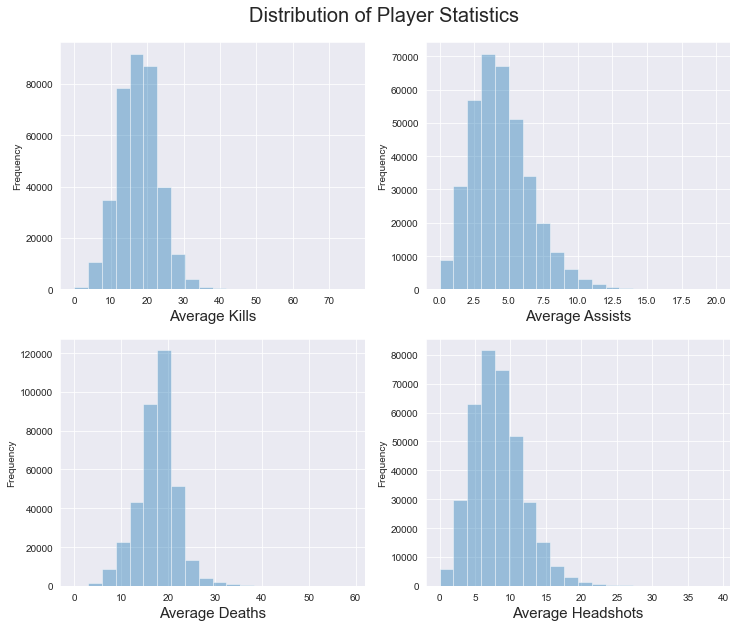

In [23]:
f, ax = plt.subplots(2, 2, figsize=(12,10))
f.suptitle('Distribution of Player Statistics', y=.93, fontsize=20)

sns.distplot(x=players['avg_kills'], kde=False, ax=ax[0,0], bins=20)
ax[0,0].set_xlabel('Average Kills', fontsize=15)
ax[0,0].set_ylabel('Frequency', fontsize=10)

sns.distplot(x=players['avg_assists'], kde=False, ax=ax[0,1], bins=20)
ax[0,1].set_xlabel('Average Assists', fontsize=15)
ax[0,1].set_ylabel('Frequency', fontsize=10)

sns.distplot(x=players['avg_deaths'], kde=False, ax=ax[1,0], bins=20)
ax[1,0].set_xlabel('Average Deaths', fontsize=15)
ax[1,0].set_ylabel('Frequency', fontsize=10)

sns.distplot(x=players['avg_hs'], kde=False, ax=ax[1,1], bins=20)
ax[1,1].set_xlabel('Average Headshots', fontsize=15)
ax[1,1].set_ylabel('Frequency', fontsize=10)

plt.show()

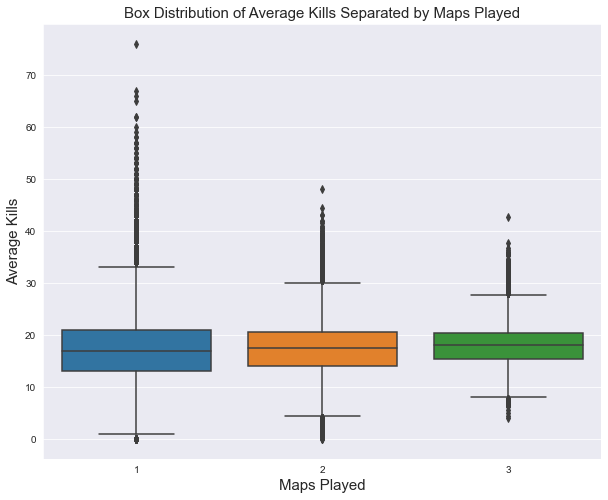

In [25]:
f, ax = plt.subplots(figsize=(10,8))
plt.title('Box Distribution of Average Kills Separated by Maps Played', fontsize=15)

sns.boxplot(x=players['maps_played'], y=players['avg_kills'], ax=ax)
ax.set_xlabel('Maps Played', fontsize=15)
ax.set_ylabel('Average Kills', fontsize=15)
plt.show()

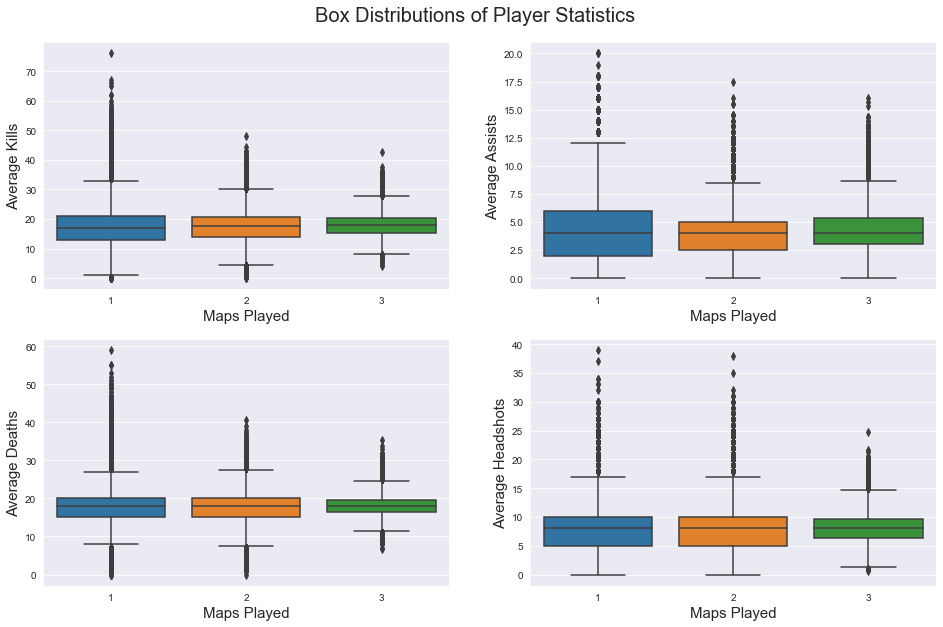

In [26]:
f, ax = plt.subplots(2, 2, figsize=(16,10))
f.suptitle('Box Distributions of Player Statistics', y=.93, fontsize=20)

sns.boxplot(x=players['maps_played'], y=players['avg_kills'], ax=ax[0,0])
ax[0,0].set_xlabel('Maps Played', fontsize=15)
ax[0,0].set_ylabel('Average Kills', fontsize=15)

sns.boxplot(x=players['maps_played'], y=players['avg_assists'], ax=ax[0,1])
ax[0,1].set_xlabel('Maps Played', fontsize=15)
ax[0,1].set_ylabel('Average Assists', fontsize=15)

sns.boxplot(x=players['maps_played'], y=players['avg_deaths'], ax=ax[1,0])
ax[1,0].set_xlabel('Maps Played', fontsize=15)
ax[1,0].set_ylabel('Average Deaths', fontsize=15)

sns.boxplot(x=players['maps_played'], y=players['avg_hs'], ax=ax[1,1])
ax[1,1].set_xlabel('Maps Played', fontsize=15)
ax[1,1].set_ylabel('Average Headshots', fontsize=15)

plt.show()

From the boxplot of avg_kills values with 1 map played, the outliers for the column are a part of that group of values. We see that most of the data is right-skewed.

It seems like while 40-50 average kills is still atainable in best of 2s and 3s so we will drop the points that are above 45 average kills.

We'll apply the same logic to the other 3 columns of data.

In [27]:
players.drop(players[players['avg_kills'] > 45].index, inplace=True)
players.drop(players[players['avg_assists'] > 12.5].index, inplace=True)
players.drop(players[players['avg_deaths'] > 35].index, inplace=True)
players.drop(players[players['avg_hs'] > 22.5].index, inplace=True)

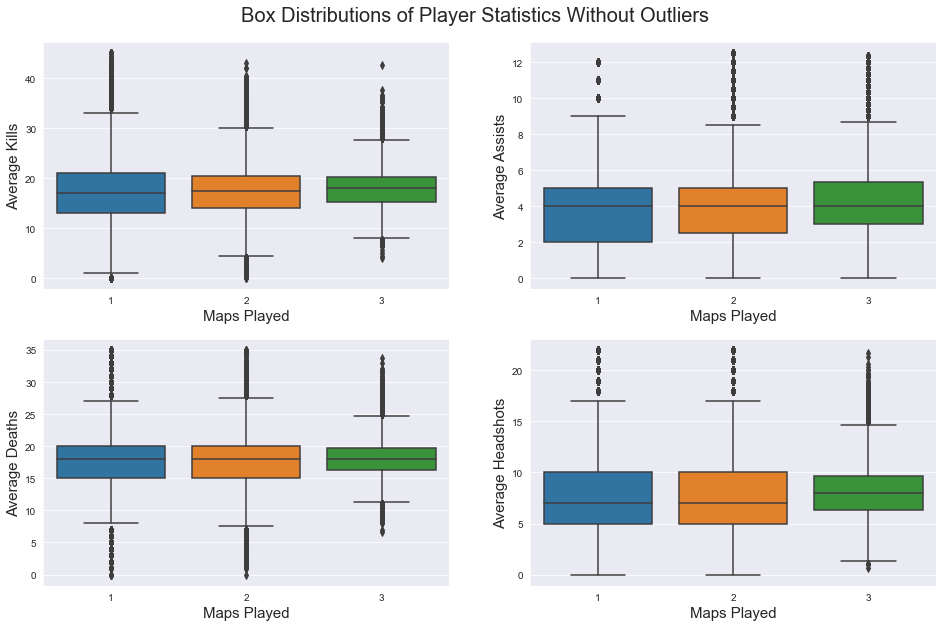

In [29]:
f, ax = plt.subplots(2, 2, figsize=(16,10))
f.suptitle('Box Distributions of Player Statistics Without Outliers', y=.93, fontsize=20)

sns.boxplot(x=players['maps_played'], y=players['avg_kills'], ax=ax[0,0])
ax[0,0].set_xlabel('Maps Played', fontsize=15)
ax[0,0].set_ylabel('Average Kills', fontsize=15)

sns.boxplot(x=players['maps_played'], y=players['avg_assists'], ax=ax[0,1])
ax[0,1].set_xlabel('Maps Played', fontsize=15)
ax[0,1].set_ylabel('Average Assists', fontsize=15)

sns.boxplot(x=players['maps_played'], y=players['avg_deaths'], ax=ax[1,0])
ax[1,0].set_xlabel('Maps Played', fontsize=15)
ax[1,0].set_ylabel('Average Deaths', fontsize=15)

sns.boxplot(x=players['maps_played'], y=players['avg_hs'], ax=ax[1,1])
ax[1,1].set_xlabel('Maps Played', fontsize=15)
ax[1,1].set_ylabel('Average Headshots', fontsize=15)

plt.show()

<AxesSubplot:>

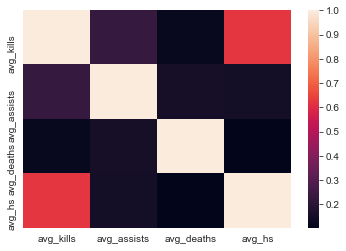

In [ ]:
sns.heatmap(players[['avg_kills', 'avg_assists', 'avg_deaths', 'avg_hs']].corr())

In [ ]:
players = players.drop(players.loc[:, 'm1_kills':'m3_rating_t'].columns, axis = 1).head()

In [ ]:
players.head()

,date,player_name,team,opponent,country,player_id,match_id,event_id,event_name,best_of,map_1,map_2,map_3,kills,assists,deaths,hs,kast,kddiff,adr,fkdiff,rating,maps_played,avg_kills,avg_assists,avg_deaths,avg_hs
0,2020-02-26,Brehze,Evil Geniuses,Liquid,United States,9136,2339385,4901,IEM Katowice 2020,3,Overpass,Nuke,Inferno,57,14,61,29,71.1,-4,79.9,0,1.04,3,19.000000,5.666667,20.333333,9.666667
1,2020-02-26,CeRq,Evil Geniuses,Liquid,Bulgaria,11219,2339385,4901,IEM Katowice 2020,3,Overpass,Nuke,Inferno,54,10,54,18,65.1,0,71.7,2,0.98,3,18.000000,4.666667,18.000000,6.000000
2,2020-02-26,EliGE,Liquid,Evil Geniuses,United States,8738,2339385,4901,IEM Katowice 2020,3,Overpass,Nuke,Inferno,55,10,51,28,67.5,4,77.9,1,1.08,3,18.333333,3.000000,17.000000,9.333333
3,2020-02-26,Ethan,Evil Geniuses,Liquid,United States,10671,2339385,4901,IEM Katowice 2020,3,Overpass,Nuke,Inferno,43,5,54,18,65.1,-11,58.7,-4,0.83,3,14.333333,2.333333,18.000000,6.000000
4,2020-02-26,NAF,Liquid,Evil Geniuses,Canada,8520,2339385,4901,IEM Katowice 2020,3,Overpass,Nuke,Inferno,52,22,46,23,77.1,6,75.9,-1,1.08,3,17.333333,5.666667,15.333333,7.666667


<AxesSubplot:>

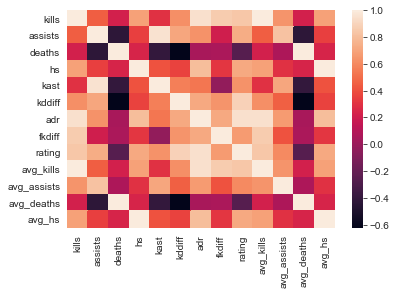

In [ ]:
sns.heatmap(players.drop(['player_id', 'match_id', 'event_id', 'best_of', 'maps_played'], axis=1).corr())